<a href="https://colab.research.google.com/github/nishaarya/nishaarya.github.io/blob/master/Project_1_Africa_Economic%2C_Banking_and_Systemic_Crisis_Data_Nisha_Arya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#website: https://www.kaggle.com/chirin/africa-economic-banking-and-systemic-crisis-data/downloads/africa-economic-banking-and-systemic-crisis-data.zip/1

In [2]:
import pandas as pd
!pip install psutil requests
df = pd.read_csv('african_crises.csv')
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [3]:
df.shape
# (1059, 14) as output which means our dataset has 1059 rows and 14 columns

(1059, 14)

In [4]:
df.columns
# case - A number which denotes a specific country
# cc3 - A three letter country code
#country - The name of the country
#year - The year of the observation
#systemic_crisis - "0" means that no systemic crisis occurred in the year and "1" means that a systemic crisis occurred in the year.
#exch_usd - The exchange rate of the country vis-a-vis the USD
#domestic_debt_in_default - "0" means that no sovereign domestic debt default occurred in the year and "1" means that a sovereign domestic debt default occurred in the year
#sovereign_external_debt_default - "0" means that no sovereign external debt default occurred in the year and "1" means that a sovereign external debt default occurred in the year
#gdp_weighted_default - The total debt in default vis-a-vis the GDP
#inflation_annual_cpi - The annual CPI Inflation rate
#independence - "0" means "no independence" and "1" means "independence"
#currency_crises - "0" means that no currency crisis occurred in the year and "1" means that a currency crisis occurred in the year
#inflation_crises - "0" means that no inflation crisis occurred in the year and "1" means that an inflation crisis occurred in the year
#banking_crisis - "no_crisis" means that no banking crisis occurred in the year and "crisis" means that a banking crisis occurred in the year

Index(['case', 'cc3', 'country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis'],
      dtype='object')

In [5]:
unique_countries=df.country.unique()
print(df.country.unique())

['Algeria' 'Angola' 'Central African Republic' 'Ivory Coast' 'Egypt'
 'Kenya' 'Mauritius' 'Morocco' 'Nigeria' 'South Africa' 'Tunisia' 'Zambia'
 'Zimbabwe']


In [6]:
df.dtypes

case                                 int64
cc3                                 object
country                             object
year                                 int64
systemic_crisis                      int64
exch_usd                           float64
domestic_debt_in_default             int64
sovereign_external_debt_default      int64
gdp_weighted_default               float64
inflation_annual_cpi               float64
independence                         int64
currency_crises                      int64
inflation_crises                     int64
banking_crisis                      object
dtype: object

In [7]:
df.describe()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


In [8]:
df.isnull().sum()

case                               0
cc3                                0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

In [9]:
import numpy as np

print(np.NaN)

nan


In [0]:
df = df.replace("?", np.NaN)

In [11]:
df.isnull().sum()
#there are no null values

case                               0
cc3                                0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

In [0]:
# Did the USD exchange rate impact inflation and CPI in a way that created a banking crisis in Africa?

# an exchange rate is the rate at which one currency will be exchanged for another. 
# It is also regarded as the value of one country's currency in relation to another currency
# Exchange rates are determined in the foreign exchange market
# the exchange market is open to a wide range of different types of buyers and sellers, and where currency trading is continuous

# Inflation is a quantitative measure of the rate at which the average price level of a basket of selected goods and services in an economy increases over a period of time.
# It is the constant rise in the general level of prices where a unit of currency buys less than it did in prior periods
# inflation indicates a decrease in the purchasing power of a nation’s currency.
# As prices rise, a single unit of currency loses value as it buys fewer goods and services. 
# This loss of purchasing power impacts the general cost of living for the public which ultimately leads to a deceleration in economic growth.

# The CPI is a measure that examines the average price of a basket of goods and services which are of primary consumer needs. 
# They include transportation, food and medical care. 
# CPI is calculated by taking price changes for each item in the predetermined basket of goods and averaging them based on their relative weight in the whole basket. 
# Changes in the CPI are used to assess price changes associated with the cost of living
# CPI is one of the most frequently used statistics for identifying periods of inflation or deflation.

In [0]:
#RESEARCH QUESTION - DOES THE EXCHANGE RATE OF USD$ HAVE AN AFFECT ON INFLATION ANNUAL CPI RATES WHICH IN TURN CAUSE A BANKING CRISIS?

In [14]:
# create a new dataframe from 1990-2000

df2 = df[(df['year'] >=1990)]
df2 = df2[(df['year'] <=2000)]
df2.head(20)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
60,1,DZA,Algeria,1990,1,1.219080e+01,0,0,0.00,9.272,1,1,0,crisis
61,1,DZA,Algeria,1991,1,2.139190e+01,0,1,0.23,25.900,1,1,1,crisis
62,1,DZA,Algeria,1992,1,2.278140e+01,0,1,0.23,31.700,1,0,1,crisis
63,1,DZA,Algeria,1993,0,2.412300e+01,0,1,0.23,20.500,1,0,1,no_crisis
64,1,DZA,Algeria,1994,0,4.289250e+01,0,1,0.23,29.000,1,1,1,no_crisis
65,1,DZA,Algeria,1995,0,5.217500e+01,0,1,0.23,29.800,1,1,1,no_crisis
66,1,DZA,Algeria,1996,0,5.618590e+01,0,1,0.23,18.700,1,0,0,no_crisis
67,1,DZA,Algeria,1997,0,5.841390e+01,0,0,0.00,5.700,1,0,0,no_crisis
68,1,DZA,Algeria,1998,0,6.035310e+01,0,0,0.00,4.950,1,0,0,no_crisis
69,1,DZA,Algeria,1999,0,6.931430e+01,0,0,0.00,2.600,1,0,0,no_crisis


In [15]:
#CREATE A NEW SUBSET
new_df = df2[['year', 'exch_usd', 'inflation_annual_cpi', 'banking_crisis']]
new_df.head(16)

,year,exch_usd,inflation_annual_cpi,banking_crisis
60,1990,1.219080e+01,9.272,crisis
61,1991,2.139190e+01,25.900,crisis
62,1992,2.278140e+01,31.700,crisis
63,1993,2.412300e+01,20.500,no_crisis
64,1994,4.289250e+01,29.000,no_crisis
65,1995,5.217500e+01,29.800,no_crisis
66,1996,5.618590e+01,18.700,no_crisis
67,1997,5.841390e+01,5.700,no_crisis
68,1998,6.035310e+01,4.950,no_crisis
69,1999,6.931430e+01,2.600,no_crisis


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [0]:
# FIX ALL THE Y AXIS BELOW

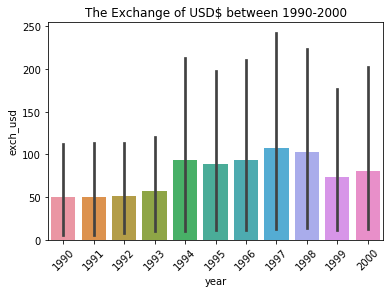

In [18]:
ax = sns.barplot(x="year" , y="exch_usd" , data=new_df) 
ax.set_title('The Exchange of USD$ between 1990-2000')
plt.xticks(rotation=45)
plt.show()

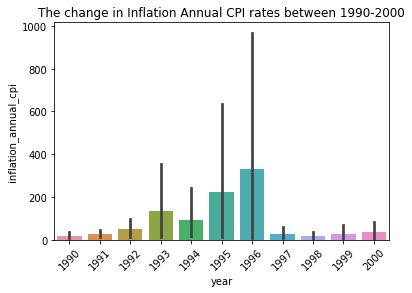

In [19]:
ax = sns.barplot(x="year" , y="inflation_annual_cpi" , data=new_df) 
ax.set_title('The change in Inflation Annual CPI rates between 1990-2000')
plt.xticks(rotation=45)
plt.show()

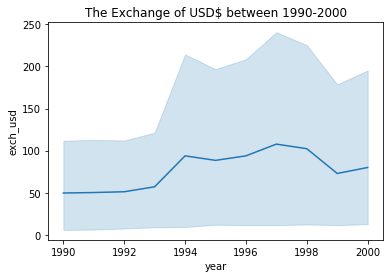

In [20]:
ax = sns.lineplot(x="year" , y="exch_usd" , data=new_df) 
ax.set_title('The Exchange of USD$ between 1990-2000')
plt.show()

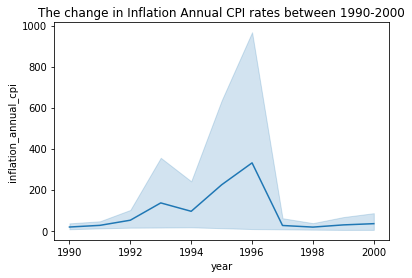

In [21]:
ax = sns.lineplot(x="year" , y="inflation_annual_cpi" , data=new_df) 
ax.set_title('The change in Inflation Annual CPI rates between 1990-2000')
plt.show()

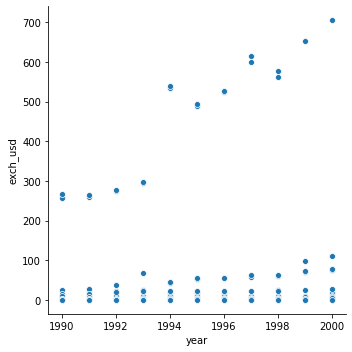

In [22]:
#CREATE A TITLE
ax = sns.relplot(x="year", y="exch_usd", data=new_df)
plt.show()

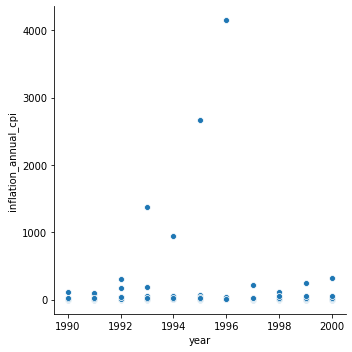

In [23]:
sns.relplot(x="year", y="inflation_annual_cpi", data=new_df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

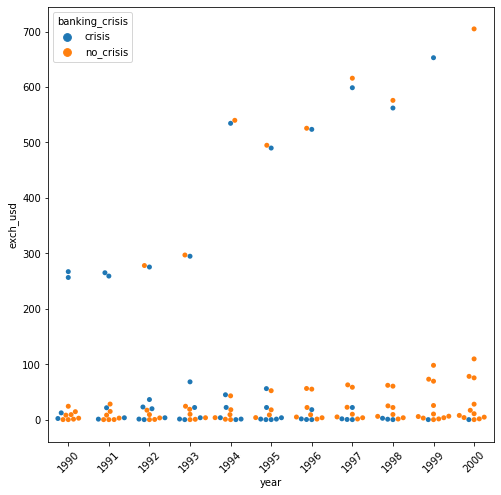

In [24]:
fig,axes = plt.subplots(figsize = (8, 8))
sns.swarmplot(x="year", y="exch_usd", data=new_df, hue="banking_crisis")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

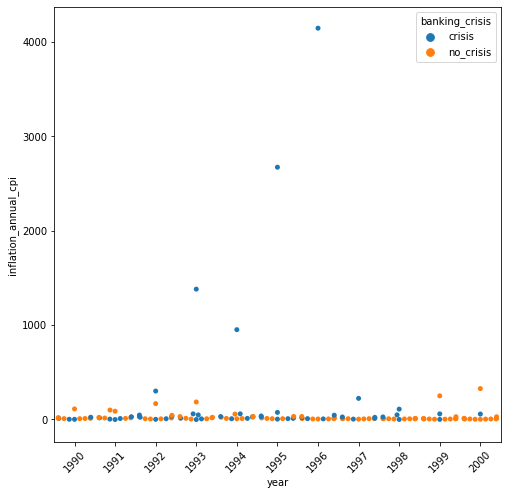

In [25]:
fig,axes = plt.subplots(figsize = (8, 8))
sns.swarmplot(x="year", y="inflation_annual_cpi", data=new_df, hue="banking_crisis")
plt.xticks(rotation=45)

In [0]:
# from the data above, in 1990 when the exchange rate of USD jumped up, it had a continuing effect on the annual cpi levels, affecting inflation
# it caused an economic crisis for three years, where the inflation rate was just increasing, leading to a banking crisis
# in 1993, the inflation rate decreased, however the exchange rate of USD was still increasing
# i believe this stabalised the economy slowly but surely, leading to no banking crisis'

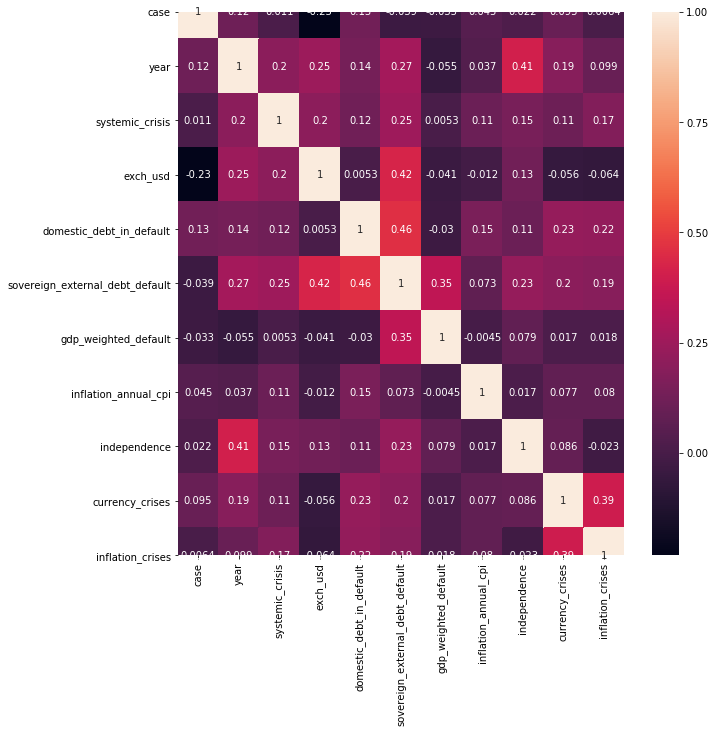

In [27]:
fig,axes = plt.subplots(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

#the higher the number the higher the linear correlated betwen the two variables

In [0]:
# looking at the above heatmap, it contradicts my research that the exchange rate of USD$ has an affect on annual inflation CPI rates, which may create a banking crisis
# the heat map tells me that the exchange of USD$ and inflation annual CPI has a -0.012 correlation
# this tells me that there is very little linear correlation between these 2  variables
# however, i can see that there is a high correlation between a fvew variables but most are quite obvious, e.g.inflation crises and currency crises
# i want to explore sovereign_external_debt_default and exch_usd

In [29]:
df3 = df[(df['year'] == 1996)]
df3.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
66,1,DZA,Algeria,1996,0,56.185900,0,1,0.23,18.700,1,0,0,no_crisis
143,2,AGO,Angola,1996,0,0.201994,1,1,0.00,4146.010,1,1,1,crisis
201,10,CAF,Central African Republic,1996,1,523.699630,0,1,0.00,3.723,1,0,0,crisis
264,15,CIV,Ivory Coast,1996,0,525.700000,0,1,0.00,2.700,1,0,0,no_crisis
419,19,EGY,Egypt,1996,0,3.388000,0,0,0.00,7.095,1,0,0,no_crisis


In [30]:
df3 = df3[['cc3', 'year', 'exch_usd', 'sovereign_external_debt_default']]
df3.head(16)

,cc3,year,exch_usd,sovereign_external_debt_default
66,DZA,1996,5.618590e+01,1
143,AGO,1996,2.019940e-01,1
201,CAF,1996,5.236996e+02,1
264,CIV,1996,5.257000e+02,1
419,EGY,1996,3.388000e+00,0
486,KEN,1996,5.502110e+01,1
554,MUS,1996,1.797150e+01,0
629,MAR,1996,8.799500e+00,0
689,NGA,1996,2.188610e+01,0
804,ZAF,1996,4.682500e+00,0


In [0]:
df3.to_csv('choro.csv')

In [32]:
df4 = df[(df['year'] == 1996)]
df4.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
66,1,DZA,Algeria,1996,0,56.185900,0,1,0.23,18.700,1,0,0,no_crisis
143,2,AGO,Angola,1996,0,0.201994,1,1,0.00,4146.010,1,1,1,crisis
201,10,CAF,Central African Republic,1996,1,523.699630,0,1,0.00,3.723,1,0,0,crisis
264,15,CIV,Ivory Coast,1996,0,525.700000,0,1,0.00,2.700,1,0,0,no_crisis
419,19,EGY,Egypt,1996,0,3.388000,0,0,0.00,7.095,1,0,0,no_crisis


In [33]:
df4 = df4[['country', 'year', 'exch_usd', 'sovereign_external_debt_default']]
df4.head(16)

,country,year,exch_usd,sovereign_external_debt_default
66,Algeria,1996,5.618590e+01,1
143,Angola,1996,2.019940e-01,1
201,Central African Republic,1996,5.236996e+02,1
264,Ivory Coast,1996,5.257000e+02,1
419,Egypt,1996,3.388000e+00,0
486,Kenya,1996,5.502110e+01,1
554,Mauritius,1996,1.797150e+01,0
629,Morocco,1996,8.799500e+00,0
689,Nigeria,1996,2.188610e+01,0
804,South Africa,1996,4.682500e+00,0


In [34]:
import pandas as pd
import plotly.graph_objs as go

fig = go.Figure(data=go.Choropleth(
    locations=df4['country'],
    z = df4['exch_usd'].astype(float),
    locationmode = 'country names',
    colorbar_title = "Exchange Rates of USD$",))

fig.update_layout(
    title_text = 'Exchange Rate of USD in 1996',
    geo_scope='africa',
)


fig.show()

In [35]:
import pandas as pd
import plotly.graph_objs as go

fig = go.Figure(data=go.Choropleth(
    locations=df4['country'],
    z = df4['sovereign_external_debt_default'].astype(float),
    locationmode = 'country names',
    colorbar_title = "Sovereign External Debt Default",))

fig.update_layout(
    title_text = 'Sovereign External Debt Default in 1996',
    geo_scope='africa',
)


fig.show()